In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [80]:
#################### CARGA DE DATOS ###################
df = pd.read_csv("data/winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [81]:
df.duplicated().sum()

937

# Target

In [35]:
##### Ahora vemos qué pinta tiene el target (la columna de calidad)

df.quality.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [39]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

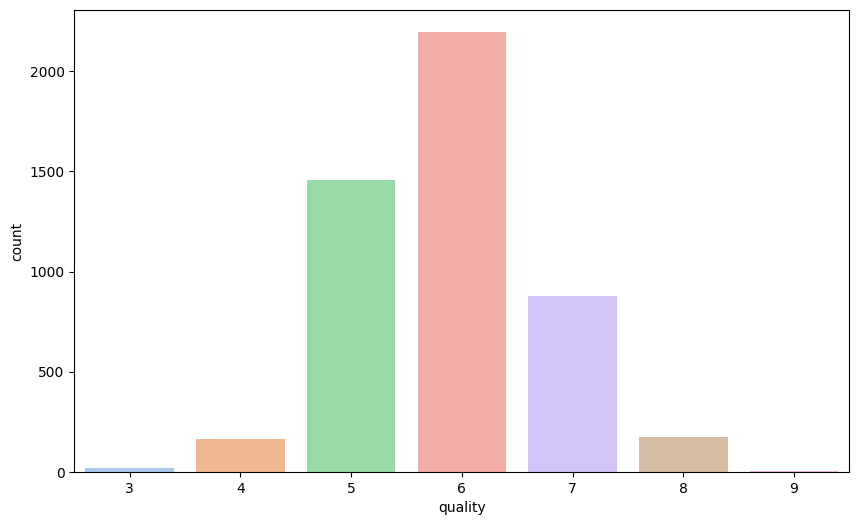

In [41]:
sns.set_palette("pastel")

fig = plt.figure(figsize = (10,6))
sns.countplot(x=df.quality)

In [85]:
''' Dado que queremos un CLASIFICADOR vamos a reagrupar las distintas calificaciones en 4 CLASES:
        - peleón [3,4]
        - regular [5,6]
        - bueno [7,8]
        - excelente [9]
'''
clases = {3:"peleón", 4:"peleón", 5:"regular", 6:"regular", 7:"bueno", 8:"bueno", 9:"excelente"}

df["target"] = df["quality"].map(clases)

# encoding target
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["label_target"] = le.fit_transform(df["target"])
df[["target","label_target"]].value_counts()


target     label_target
regular    3               3655
bueno      0               1055
peleón     2                183
excelente  1                  5
dtype: int64

In [74]:
df.groupby("target").count()
###### OJO claramente NO está BALANCEADO

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
target,,,,,,,,,,,,
bueno,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
excelente,5,5,5,5,5,5,5,5,5,5,5,5
peleón,183,183,183,183,183,183,183,183,183,183,183,183
regular,3655,3655,3655,3655,3655,3655,3655,3655,3655,3655,3655,3655


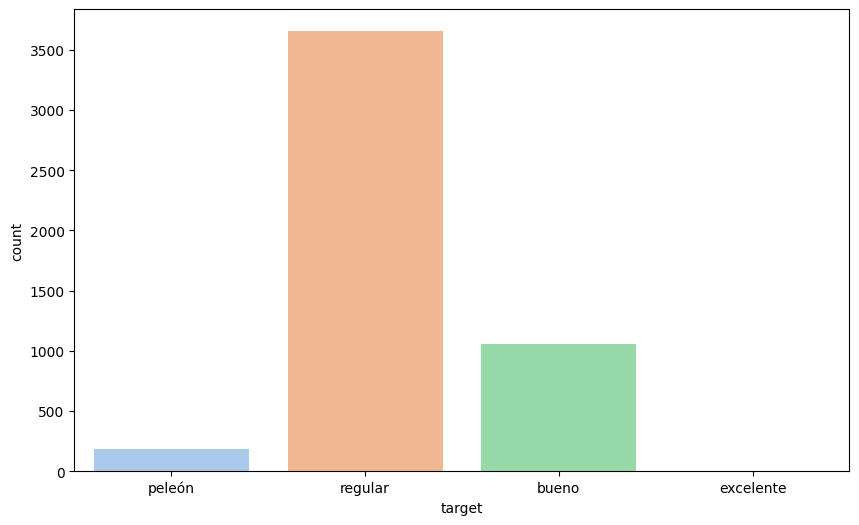

In [76]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x=df.target, order=["peleón", "regular", "bueno", "excelente"]);

In [86]:
# Ya que está bastante desbalanceado, vamos a quitar los duplicados de la categoría "regular"

df = df[~((df.duplicated())&((df.quality == 6) | (df.quality ==5)))]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target,label_target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,regular,3
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,regular,3
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,regular,3
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,regular,3
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,regular,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,regular,3
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,regular,3
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,regular,3
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,bueno,0


In [87]:
df[df.duplicated()].quality.value_counts()

7    191
8     44
4     10
Name: quality, dtype: int64

In [121]:
df[["target","label_target"]].value_counts()

target     label_target
regular    3               2963
bueno      0               1055
peleón     2                183
excelente  1                  5
dtype: int64

# Features

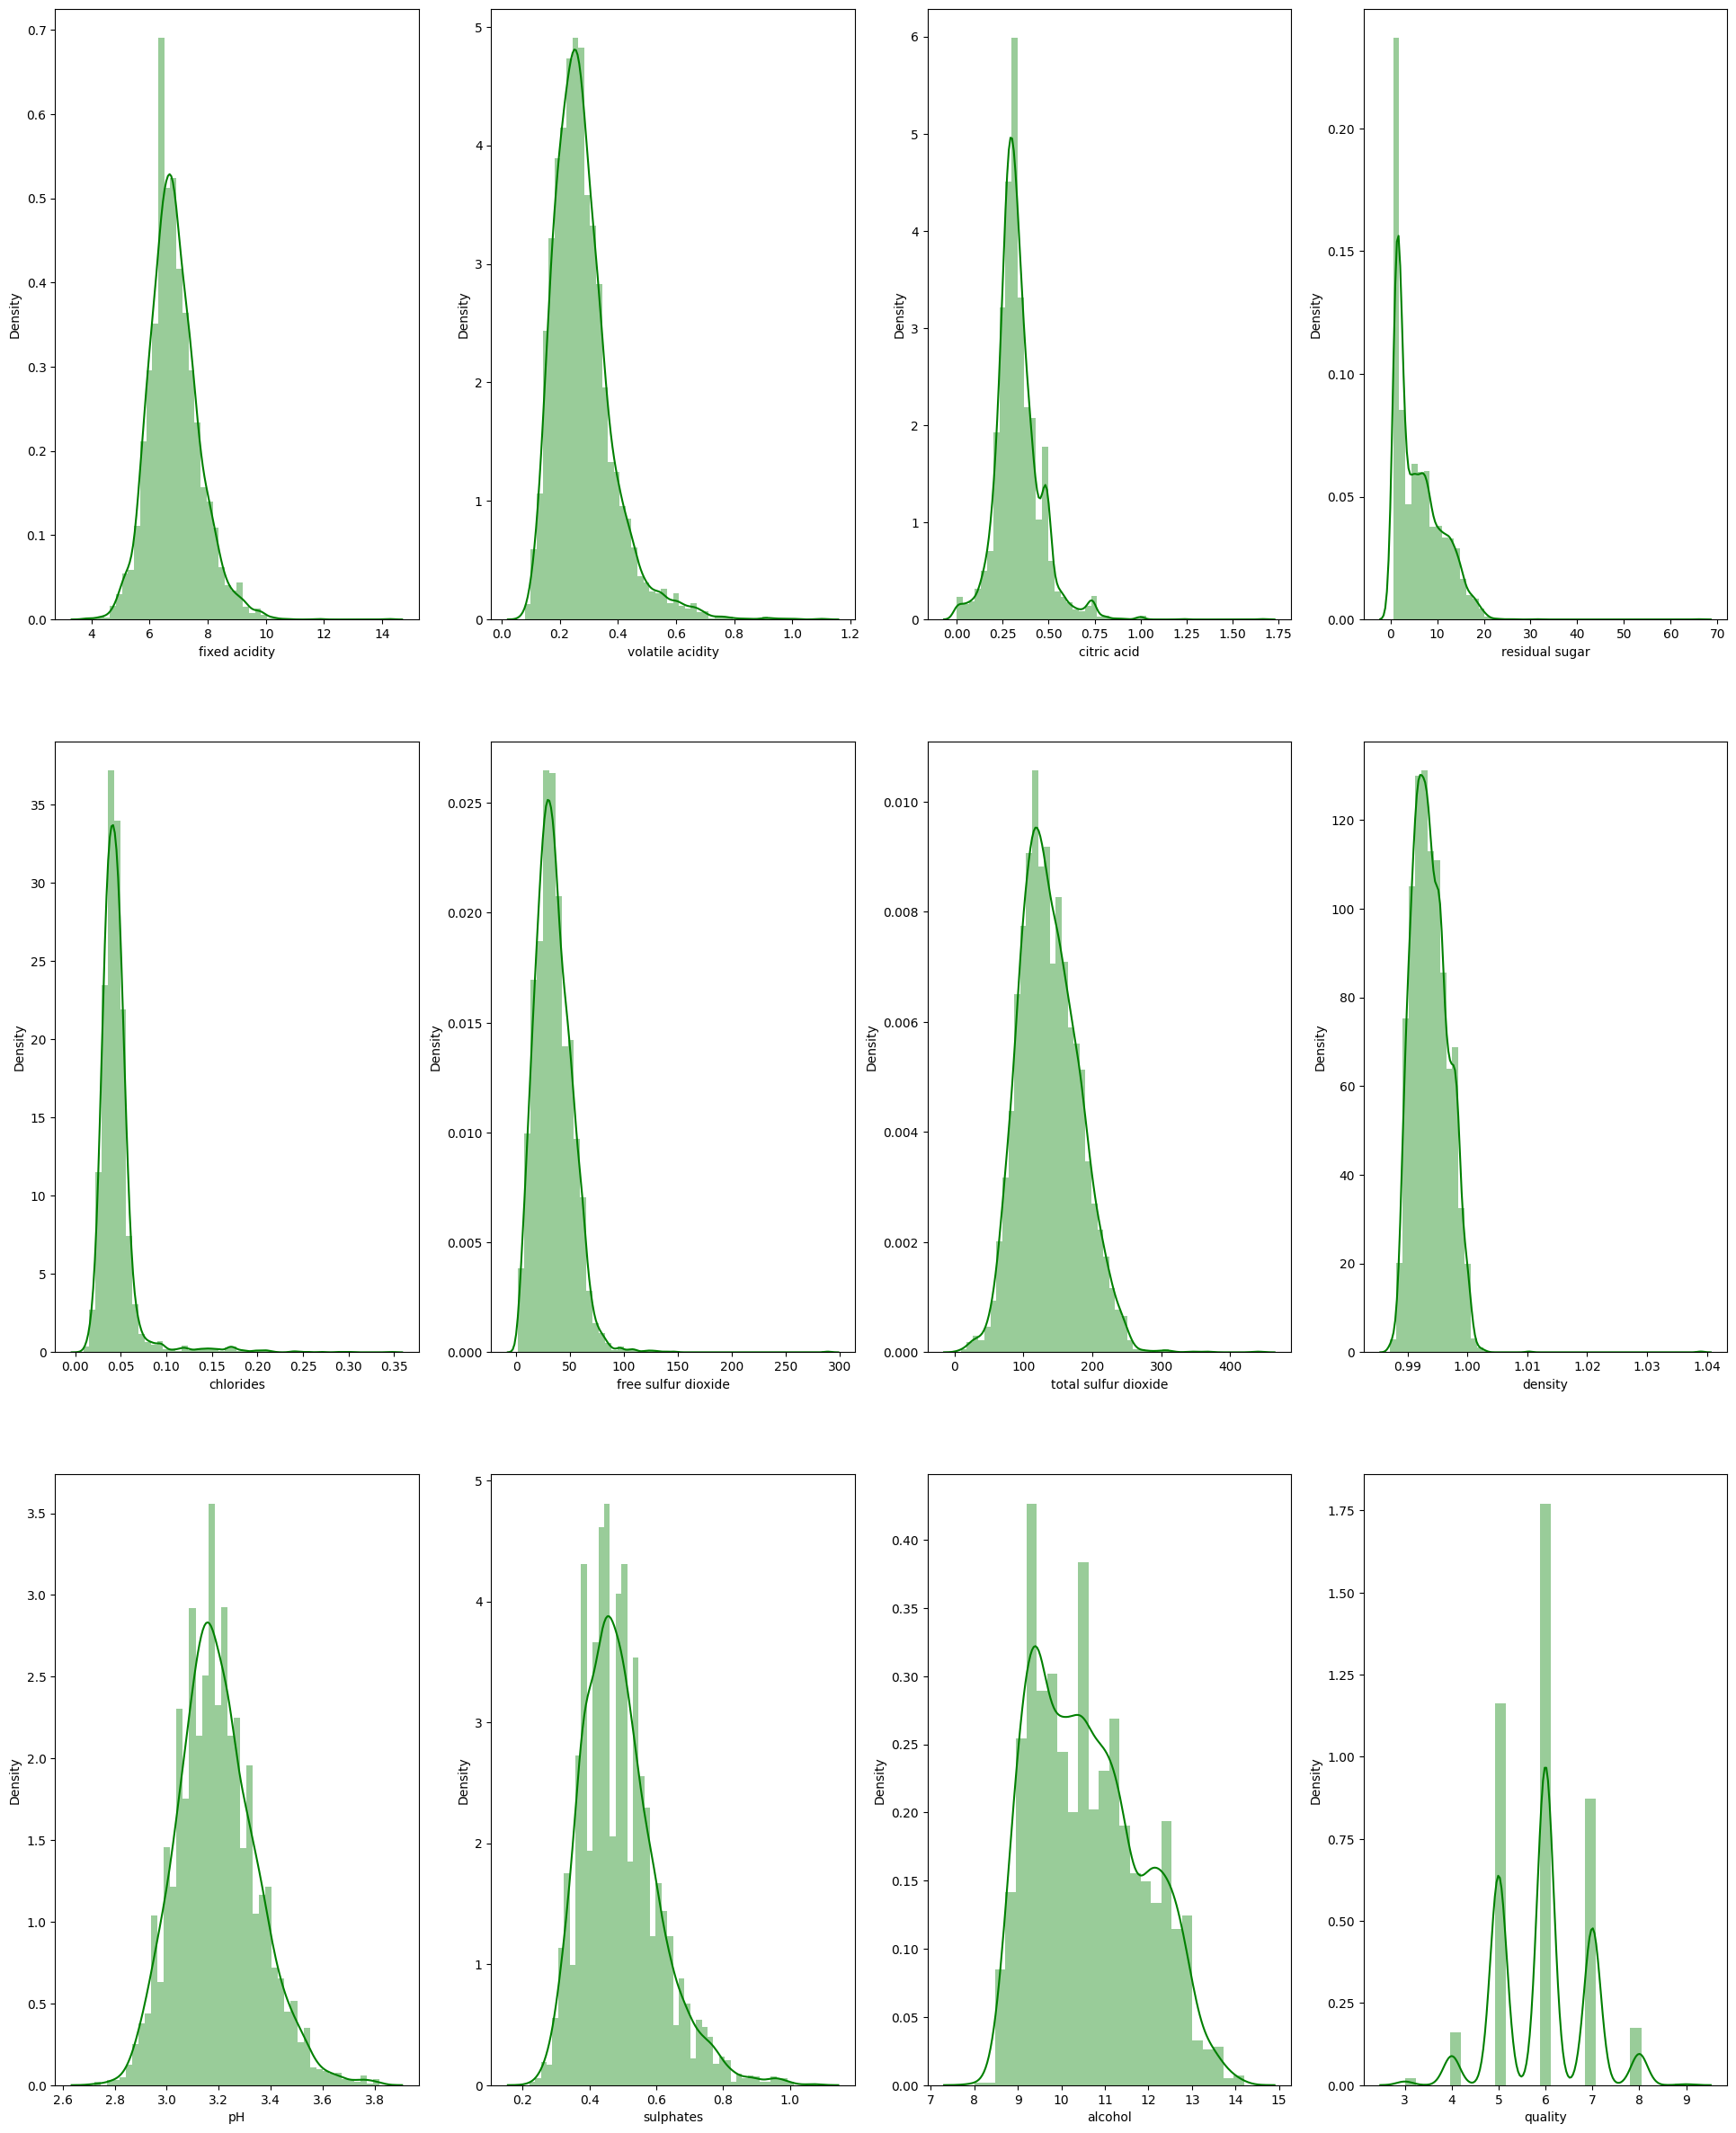

In [91]:
df_original = df.loc[:, :"quality"]

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df_original.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df_original[columns[k]], ax = ax1[i][j], color="g")
            k += 1
plt.show();

In [ ]:
# Observamos que hay variables cuya distribución se encuentra claramente escorada a la izquierda
# Tendremos que transformarlas: 
#                                --> Transformación logarítmica
#                                --> Estandarizar (optaremos por ésta)

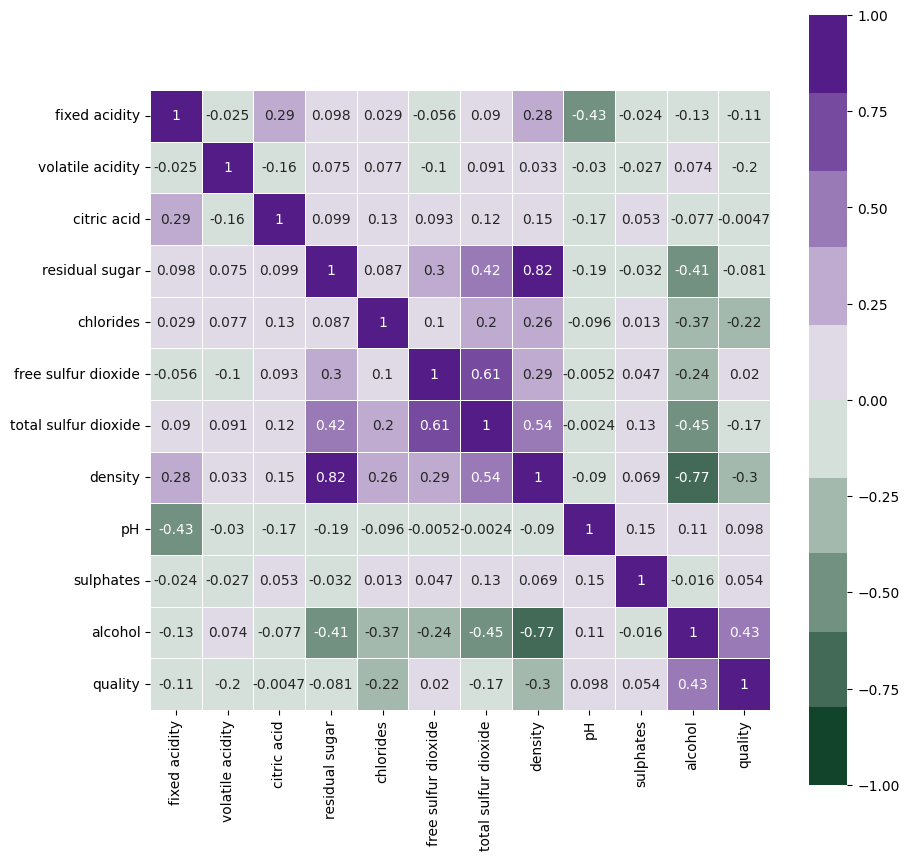

In [92]:
# Matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df_original.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [101]:
corr = np.abs(df_original.corr()['quality']).sort_values(ascending=False)

corr


quality                 1.000000
alcohol                 0.434807
density                 0.304731
chlorides               0.218027
volatile acidity        0.198139
total sulfur dioxide    0.168684
fixed acidity           0.114927
pH                      0.097629
residual sugar          0.080635
sulphates               0.054415
free sulfur dioxide     0.019690
citric acid             0.004652
Name: quality, dtype: float64

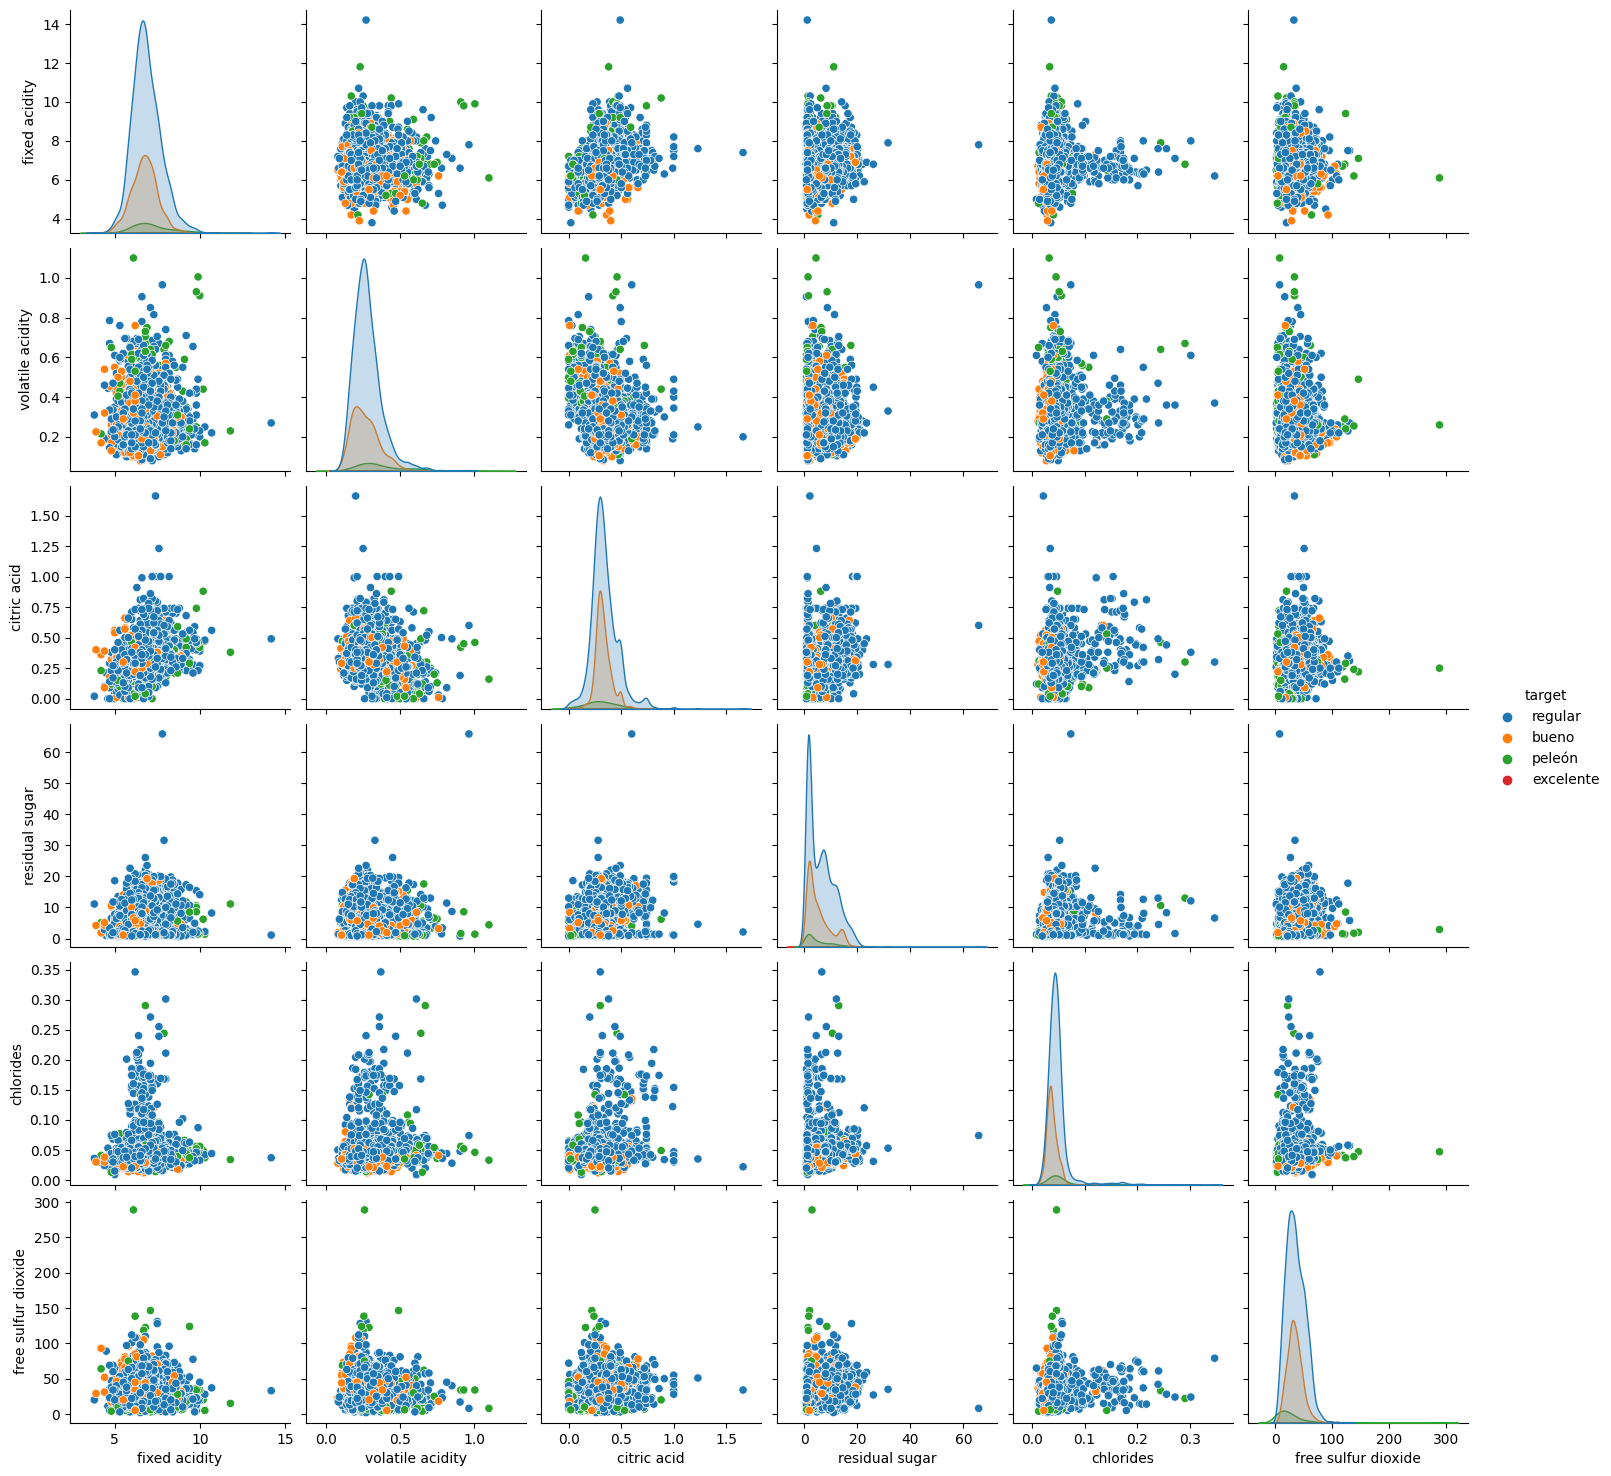

In [108]:
df_plot1 = df_original.loc[:,:"free sulfur dioxide"]
df_plot1["target"] = df["target"]

sns.set_palette("tab10")

sns.pairplot(df_plot1,
            kind='scatter',
            hue='target');

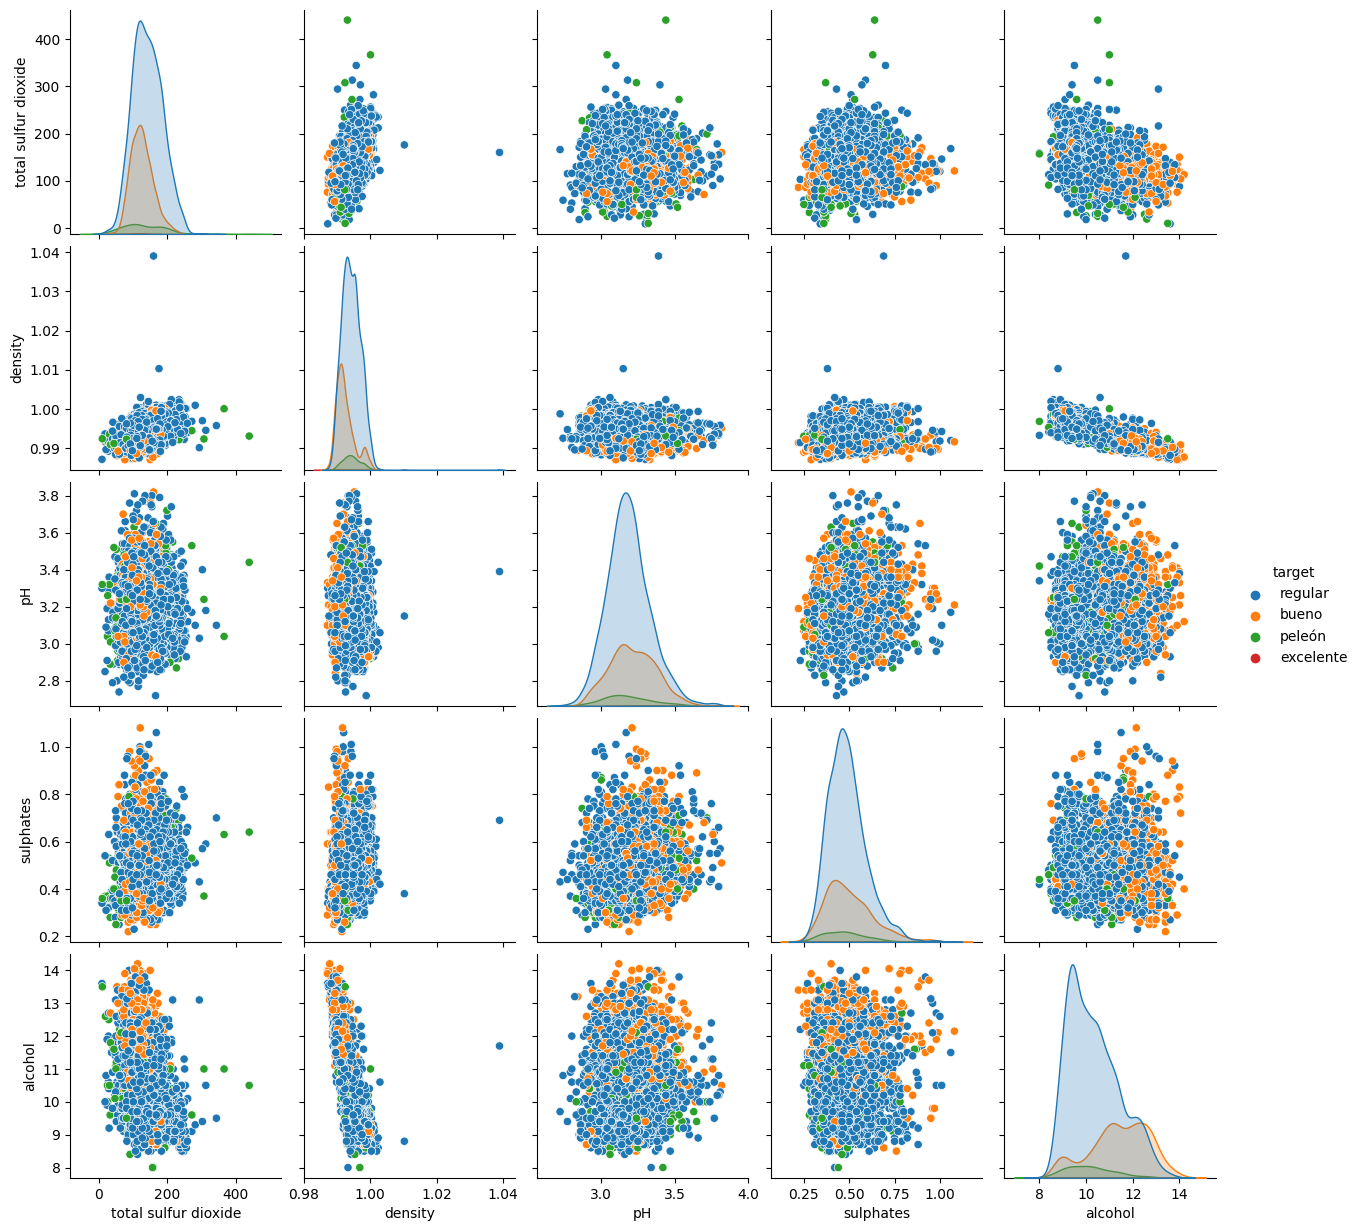

In [109]:
df_plot2 = df_original.loc[:,"total sulfur dioxide":"alcohol"]
df_plot2["target"] = df["target"]

sns.pairplot(df_plot2,
            kind='scatter',
            hue='target');

# Modelos

In [160]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [120]:
# Definimos nuestros datos de entrada y salida
X = df.loc[:,:"alcohol"]
y = df["label_target"]

# Dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=13)

In [133]:
########### dataset NO BALANCEADO

# Determinamos las transformaciones pertinentes (oversample y undersample) que luego añadiré a c/pipeline
strategy_over = {1:736, 2:736}
over = RandomOverSampler(sampling_strategy=strategy_over)

strategy_under = {0:736, 3:736}
under = RandomUnderSampler(sampling_strategy=strategy_under)

# Se lo aplicamos a una copia de nuestros datos para poder visualizarlo
X_copy = X_train.copy()
y_copy = y_train.copy()

X_copy, y_copy = over.fit_resample(X_copy, y_copy)
X_copy, y_copy = under.fit_resample(X_copy, y_copy)

y_copy.value_counts()

0    736
1    736
2    736
3    736
Name: label_target, dtype: int64

#### Regresión Logística

In [142]:
steps_reglog = [('over', over), ('under', under), 
                ('scaler', StandardScaler()), ('model', LogisticRegression())]

reg_log1 = Pipeline(steps = steps_reglog)
reg_log = make_pipeline(RandomOverSampler(),
                        RandomUnderSampler(),
                        StandardScaler(), 
                        LogisticRegression())

reglog_params = {
    "randomoversampler__sampling_strategy": strategy_over,
    "randomundersampler__sampling_strategy": strategy_under,
    "logisticregression__penalty": ["l1", "l2"],
    "logisticregression__C": np.arange(0.1, 5, 0.6),
    "logisticregression__solver": ["liblinear"]}

gs_reglog = GridSearchCV(reg_log, reglog_params, cv=10, scoring = 'accuracy',
                            n_jobs = -1,
                            verbose = 1)

gs_reglog.fit(X_train,y_train)

############ me resulta imposible meter el oversampler y undersampler en el pipeline
# lo hago por separado


'steps_reglog = [(\'over\', over), (\'under\', under), \n                (\'scaler\', StandardScaler()), (\'model\', LogisticRegression())]\n\n#reg_log = Pipeline(steps = steps_reglog)\nreg_log = make_pipeline(RandomOverSampler(),\n                        RandomUnderSampler(),\n                        StandardScaler(), \n                        LogisticRegression())\n\nreglog_params = {\n    "randomoversampler__sampling_strategy": strategy_over,\n    "randomundersampler__sampling_strategy": strategy_under,\n    "logisticregression__penalty": ["l1", "l2"],\n    "logisticregression__C": np.arange(0.1, 5, 0.6),\n    "logisticregression__solver": ["liblinear"]}\n\ngs_reglog = GridSearchCV(reg_log, reglog_params, cv=10, scoring = \'accuracy\',\n                            n_jobs = -1,\n                            verbose = 1)\n\ngs_reglog.fit(X_train,y_train)'

In [144]:
strategy_over = {1:736, 2:736}
over = RandomOverSampler(sampling_strategy=strategy_over, random_state=13)

strategy_under = {0:736, 3:736}
under = RandomUnderSampler(sampling_strategy=strategy_under, random_state=13)

X_train, y_train = over.fit_resample(X_train, y_train)
X_train, y_train = under.fit_resample(X_train, y_train)

In [145]:
steps_reglog = [('scaler', StandardScaler()), ('model', LogisticRegression())]

reg_log = Pipeline(steps = steps_reglog)

reglog_params = {
    "model__penalty": ["l1", "l2"],
    "model__C": np.arange(0.1, 5, 0.6),
    "model__solver": ["liblinear"]}

gs_reglog = GridSearchCV(reg_log, reglog_params, cv=10, scoring = 'accuracy',
                            n_jobs = -1,
                            verbose = 1)

gs_reglog.fit(X_train,y_train)

print(gs_reglog.best_estimator_)
print(gs_reglog.best_score_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=4.8999999999999995, penalty='l1',
                                    solver='liblinear'))])
0.6970206387639802


#### SVM Classifier

In [149]:
steps_svc = [("scaler", StandardScaler()), ("selectkbest", SelectKBest()), ("svc", SVC())]

svc = Pipeline(steps = steps_svc)

svc_params = {
    "selectkbest__k": [3,5,7,9,11],
    "svc__C": [0.1, 0.5, 1.5, 3, 5, 10, 15, 30, 50],
    "svc__kernel": ['linear', 'poly', 'rbf'],
    "svc__degree": [2,3,4],
    }

gs_svc = GridSearchCV(svc, svc_params, cv=10, scoring = 'accuracy',
                        n_jobs = -1,
                        verbose = 1)

gs_svc.fit(X_train,y_train)

print(gs_svc.best_estimator_)
print(gs_svc.best_score_)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=11)),
                ('svc', SVC(C=50, degree=2))])
0.8556347284676582


#### Random Forest

In [150]:
forest = RandomForestClassifier()

forest_params = {
    "n_estimators": [50,100,150,300],
    "max_depth": [3,5,7,10,15,20], 
    "max_features": [1,3,4,5]
}

gs_forest = GridSearchCV(forest, forest_params, cv=10, scoring = 'accuracy',
                        n_jobs = -1,
                        verbose = 1)

gs_forest.fit(X_train,y_train)


Fitting 10 folds for each of 96 candidates, totalling 960 fits
RandomForestClassifier(max_depth=15, max_features=1, n_estimators=150)
0.8868926553672317


In [151]:
gs_forest.best_estimator_

RandomForestClassifier(max_depth=15, max_features=1, n_estimators=150)

In [152]:
gs_forest.best_score_

0.8868926553672317

#### KNN

In [156]:
steps_knn = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())]

knn = Pipeline(steps = steps_knn)

knn_params = {
    "knn__n_neighbors": [3,5,7,9,11,13],       
    "knn__weights": ["uniform","distance"] 
}

gs_knn = GridSearchCV(knn, knn_params, cv=10, scoring = 'accuracy',
                        n_jobs = -1,
                        verbose = 1)

gs_knn.fit(X_train,y_train)

print(gs_knn.best_estimator_)
print(gs_knn.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])
0.8383154617779315


In [158]:
gs_knn.best_estimator_[1]

KNeighborsClassifier(n_neighbors=3, weights='distance')

#### Gradient Boosting

In [161]:
boost = GradientBoostingClassifier()

boost_params = {
    "loss": ["deviance"],
    "learning_rate": [0.05, 0.1, 0.25, 0.5],
    "n_estimators": [50,100,150,300],
    "max_depth": [1,2,3,4,5,7],
    "max_features": [1,3,4,5],
}

gs_boost = GridSearchCV(boost, boost_params, cv=10, scoring = 'accuracy',
                        n_jobs = -1,
                        verbose = 1)

gs_boost.fit(X_train,y_train)

print(gs_boost.best_estimator_)
print(gs_boost.best_score_)


Fitting 10 folds for each of 384 candidates, totalling 3840 fits
GradientBoostingClassifier(max_depth=7, max_features=4, n_estimators=150)
0.8851781390522311


In [166]:
###################### COMPARATIVA DE MODELOS #########################
modelos = {
    "Regresión Logística": gs_reglog,
    "SVC": gs_svc,
    "Random Forest": gs_forest,
    "KNN": gs_knn,
    "Gradient Boosting": gs_boost
}

comparativa = [(i, j.best_score_) for i, j in modelos.items()]

tabla = pd.DataFrame(comparativa, columns = ["Modelo", "Puntuación"])
tabla.sort_values(by = "Puntuación", ascending = False, ignore_index=True)

,Modelo,Puntuación
0,Random Forest,0.886893
1,Gradient Boosting,0.885178
2,SVC,0.855635
3,KNN,0.838315
4,Regresión Logística,0.697021


In [167]:
# Probamos en test nuestro mejor modelo: Random Forest

estimador = gs_forest.best_estimator_
estimador.score(X_test, y_test)

0.748811410459588

# Resultados

In [168]:
######################### Guardamos modelo #####################

import pickle

with open("random_forest.model", "wb") as predictor:
    pickle.dump(estimador, predictor)

              precision    recall  f1-score   support

           0       0.54      0.83      0.66       307
           1       0.00      0.00      0.00         2
           2       0.41      0.44      0.43        45
           3       0.91      0.74      0.81       908

    accuracy                           0.75      1262
   macro avg       0.46      0.50      0.47      1262
weighted avg       0.80      0.75      0.76      1262



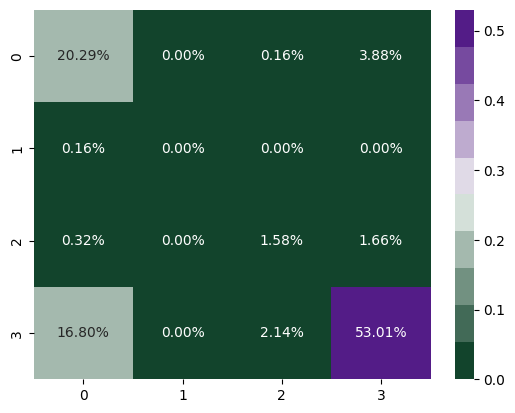

In [173]:
######################## Predicciones ########################

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, precision_recall_curve

predicciones = estimador.predict(X_test)

print(classification_report(y_test, predicciones)) 

matrix = confusion_matrix(y_test, predicciones)
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10));

In [181]:
print("Score del modelo (accuracy):", round(estimador.score(X_test, y_test), 4))
print("Accuracy:", round(accuracy_score(y_test,predicciones), 4))
print("Recall:", round(recall_score(y_test, predicciones, average="weighted"), 4))
print("Precision:", round(precision_score(y_test, predicciones, average="weighted"), 4))
print("F1:", round(f1_score(y_test, predicciones, average="weighted"), 4))
print("AUC:", round(roc_auc_score(y_test, estimador.predict_proba(X_test), multi_class="ovr"), 4))

Score del modelo (accuracy): 0.7488
Accuracy: 0.7488
Recall: 0.7488
Precision: 0.7973
F1: 0.7592
AUC: 0.836
